**Data Analysis Internship Task**

**Level 2**

In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from itertools import combinations


In [2]:
# Upload dataset
from google.colab import files
uploaded = files.upload()

# Load the dataset
df = pd.read_csv('Dataset .csv')
df.head()

Saving Dataset .csv to Dataset .csv


,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


Task 1: Cuisine Combination

Top Cuisine Combinations: [(('Chinese', 'North Indian'), 1784), (('Mughlai', 'North Indian'), 832), (('Fast Food', 'North Indian'), 485), (('Continental', 'North Indian'), 468), (('Chinese', 'Fast Food'), 466), (('North Indian', 'South Indian'), 405), (('Chinese', 'Mughlai'), 379), (('Chinese', 'South Indian'), 346), (('Chinese', 'Continental'), 303), (('Italian', 'North Indian'), 295)]
Combo Ratings: [('Chinese + North Indian', np.float64(2.7)), ('Mughlai + North Indian', np.float64(2.77)), ('Fast Food + North Indian', np.float64(2.7)), ('Continental + North Indian', np.float64(3.41)), ('Chinese + Fast Food', np.float64(2.58)), ('North Indian + South Indian', np.float64(2.55)), ('Chinese + Mughlai', np.float64(2.7)), ('Chinese + South Indian', np.float64(2.48)), ('Chinese + Continental', np.float64(3.36)), ('Italian + North Indian', np.float64(3.53))]


<ipython-input-3-2b6c4d5d1e67>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=values, y=labels, palette="viridis")


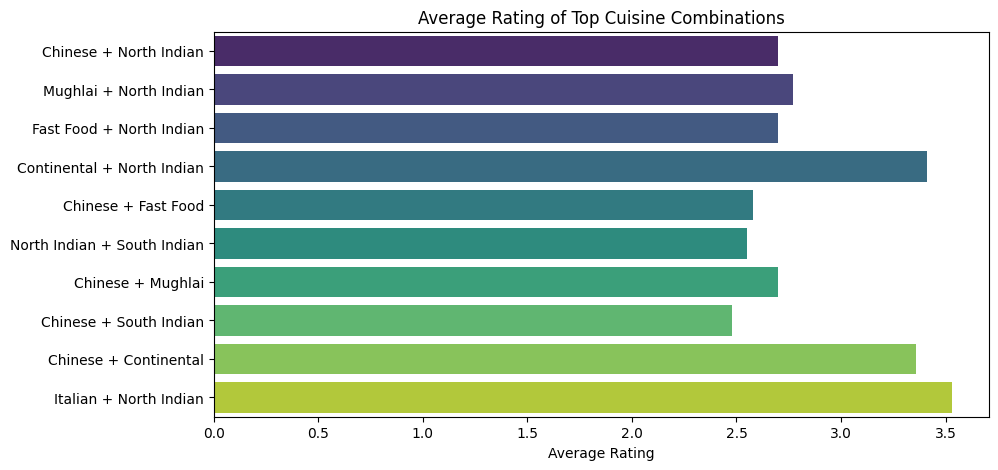

In [3]:
# Drop missing cuisines
df_cuisine = df.dropna(subset=['Cuisines'])

# Count top combinations of cuisines (only 2-cuisine pairs)
combo_counts = Counter()

for row in df_cuisine['Cuisines']:
    cuisines = [c.strip() for c in row.split(',')]
    if len(cuisines) > 1:
        for combo in combinations(sorted(cuisines), 2):
            combo_counts[combo] += 1

# Top 10 combinations
top_combos = combo_counts.most_common(10)
print("Top Cuisine Combinations:", top_combos)

# Average rating for each top combo
ratings = []
for combo, _ in top_combos:
    pattern = ', '.join(combo)
    matches = df_cuisine[df_cuisine['Cuisines'].str.contains(combo[0]) & df_cuisine['Cuisines'].str.contains(combo[1])]
    avg_rating = matches['Aggregate rating'].mean()
    ratings.append((f"{combo[0]} + {combo[1]}", round(avg_rating, 2)))

# Show
print("Combo Ratings:", ratings)

# Plot
labels = [x[0] for x in ratings]
values = [x[1] for x in ratings]

plt.figure(figsize=(10,5))
sns.barplot(x=values, y=labels, palette="viridis")
plt.title("Average Rating of Top Cuisine Combinations")
plt.xlabel("Average Rating")
plt.show()


Task 2: Geographic Analysis

Longitude    0
Latitude     0
dtype: int64


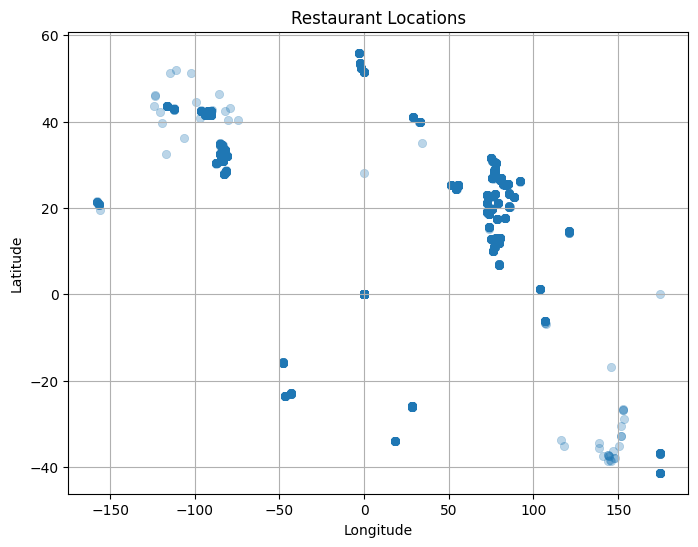

In [4]:
# Check columns
print(df[['Longitude', 'Latitude']].isnull().sum())

# Basic scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Longitude', y='Latitude', data=df, alpha=0.3, edgecolor=None)
plt.title("Restaurant Locations")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)
plt.show()


 Task 3: Restaurant Chains

Top Chains:
 Restaurant Name
Cafe Coffee Day     83
Domino's Pizza      79
Subway              63
Green Chick Chop    51
McDonald's          48
Keventers           34
Pizza Hut           30
Giani               29
Baskin Robbins      28
Barbeque Nation     26
Name: count, dtype: int64


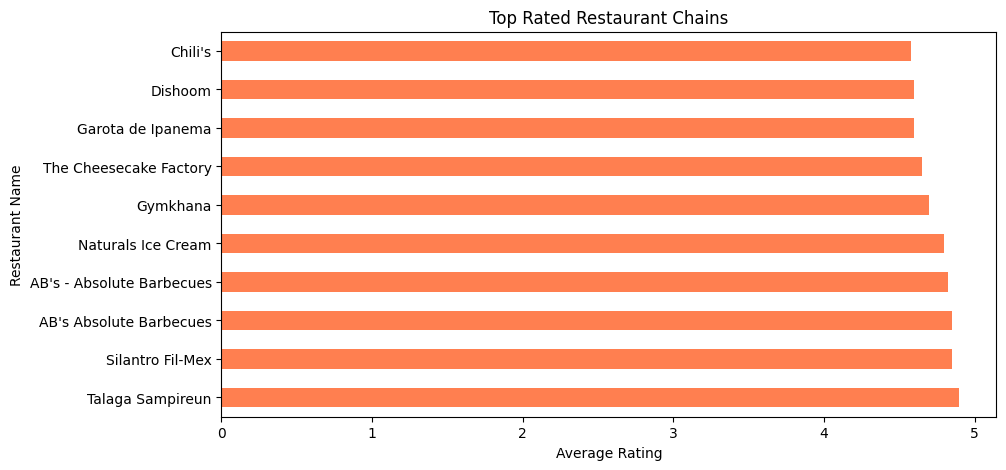

In [5]:
# Count restaurant names
chain_counts = df['Restaurant Name'].value_counts()
chains = chain_counts[chain_counts > 1]
print("Top Chains:\n", chains.head(10))

# Filter for chains only
chain_df = df[df['Restaurant Name'].isin(chains.index)]

# Analyze ratings of chains
chain_ratings = chain_df.groupby('Restaurant Name')['Aggregate rating'].mean().sort_values(ascending=False).head(10)

# Plot
plt.figure(figsize=(10,5))
chain_ratings.plot(kind='barh', color='coral')
plt.title("Top Rated Restaurant Chains")
plt.xlabel("Average Rating")
plt.show()
